In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib
import numpy as np

# usually this notebook is loaded as top-level-module and relative import of chsimpy does not work.
# so we provide the path to the chsimpy package manually
import pathlib
import sys

try:
    import chsimpy
except ImportError:
    _parentdir = pathlib.Path("./").resolve().parent
    sys.path.insert(0, str(_parentdir))
    import chsimpy
    #sys.path.remove(str(_parentdir))

# auto reload if chsimpy code changed
%load_ext autoreload
%autoreload 2

def clear_plots():
    plt.clf()
    plt.close('all')

In [2]:
%matplotlib notebook
from chsimpy import *
simulator = None

In [37]:
params = Parameters()  # initial parameter configuration
params.N = 512  # resolution (NxN image)

# params.ntmax = 1  # maximal number of simulation steps
# params.time_max = 40  # max sim time in minutes, ignores ntmax

params.XXX = 0.89  # mean initial concentration of U
params.threshold = params.XXX  # threshold value to determine components A and B in U

# A0T,A1T,t0,tau0,N,XXX,delt,kappa,M
# -151.256802444472,-85.9668048420325,1243.04125166667,709,512,0.89,1e-11,0.285187639207216,2e-11
# -151.789039744226,-85.2918424513144,1872.45142,1068,512,0.89,1e-11,0.285187639207216,2e-11
# -150.640294426235,-85.414958074413,1395.57240666667,796,512,0.89,1e-11,0.285187639207216,2e-11
# ..
# -151.532994592672,-85.3818043139459,1714.66057,978,512,0.89,1e-11,0.285187639207216,2e-11 [85]
# 
# SA[-1] = 0.55687
params.delt = 1e-11
params.Uinit_file = '../experiments/U_init-0.89.csv'
params.func_A0 = lambda temp: -151.532994592672
params.func_A1 = lambda temp: -85.3818043139459
# params.delt_max = 9e-11
# params.adaptive_time = True
# params.kappa_base = 30  # for kappa = kappa_base / 105.1939
# params.M = 2e-11  # mobility factor
# params.full_sim = True  # False -> will stop early when energy falls

params.yaml = False  # do (not) export to yaml (metadata)
params.png = False  # do (not) export to PNG
params.export_csv = None  # can be a enumeration like 'U,E,E2,SA'
params.no_diagrams = False  # render only concentration image of U
# params.update_every = 5  # update view every x steps
# params.file_id = f"N{params.N}-{params.time_max}min-K{params.kappa_base}-a{params.adaptive_time}-M{params.M}"  # existing files will be overwritten

# init simulation with parameters
U_init = chsimpy.utils.csv_import_matrix('../_output/matlab-randA-c0/U_init-0.89.csv')
simulator = Simulator(params, U_init)

# str(params)  # show all parameters

In [38]:
## custom initial U, if needed (uncomment then)
# import numpy as np
# rng = np.random.default_rng(seed=2023)
# U_0 = 0.89 + (0.0089 * (rng.random((params.N, params.N)) - 0.5))
# simulator = chsimpy.simulator.Simulator(params, U_0)

In [39]:
# from perlin_numpy import (
#     generate_perlin_noise_2d, generate_fractal_noise_2d
# )
# np.random.seed(2023)
# noise = generate_fractal_noise_2d((512, 512), (8, 8), 5)
# U_0 = 0.89 + (0.0089 * (noise - 0.5))
# simulator = chsimpy.simulator.Simulator(params, U_0)

In [40]:
solution.t0, solution.tau0, 1-solution.SA[-1], np.argmax(solution.E2)

(1639.2716083333144, 935, 0.43534088134765625, 934)

<IPython.core.display.Javascript object>


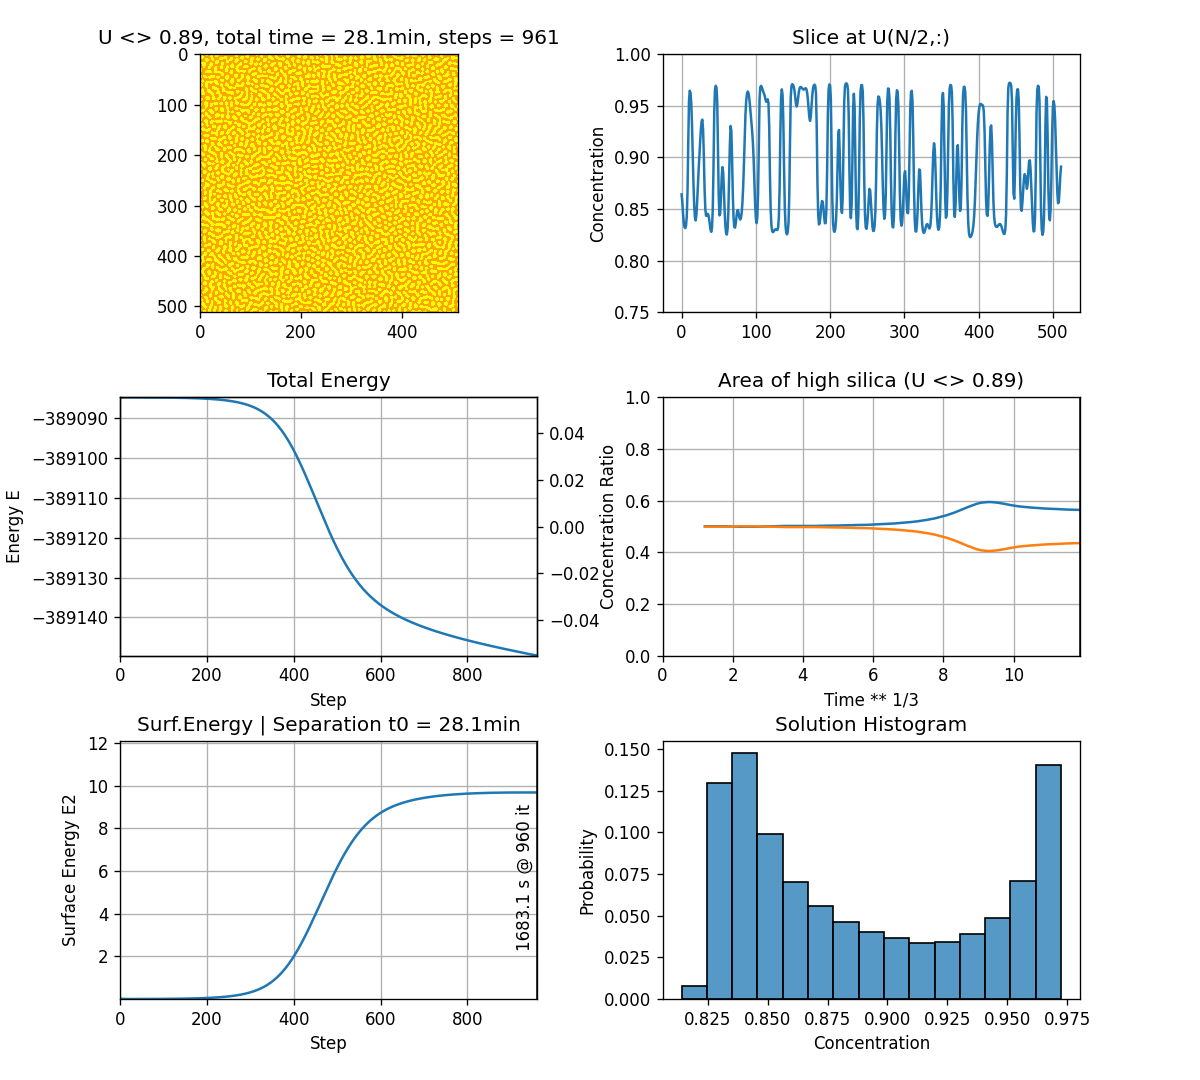

(1683.10239999998, 960, 0.4357757568359375, 934)

In [41]:
solution = simulator.solve()
solution.t0, solution.tau0, 1-solution.SA[-1], np.argmax(solution.E2)
#simulator.render()
# simulator.export()  # export yaml, png, csv if provided in parameters (yaml, png, png_anim, export_csv, file_id)

In [ ]:
clear_plots()

U = solution.U
Ureal = np.real(U)
N = simulator.solver.params.N
th = 0.885  # threshold

# colormap, https://matplotlib.org/2.0.2/users/colormaps.html
cmap = colors.ListedColormap(['orange', 'yellow'])
boundaries = [0.0, th, 1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

fig = plt.figure(figsize=(12,5))
# nrow, ncol, index
ax1 = fig.add_subplot(1, 2, 1)

#ax1.imshow(Ureal, cmap=cmap, norm=norm, aspect="equal")
ax1.imshow(Ureal, cmap="plasma", aspect="equal")

ax2 = fig.add_subplot(1, 2, 2) 

#ax.cla()
#ax2.set_xlim(0, N)
#ax2.set_ylim(0.5, 1)

# https://matplotlib.org/2.0.2/users/colormaps.html
ax2.plot(np.arange(0,N), Ureal[int(N / 2)+1,:])

In [ ]:
clear_plots()

U = solution.U
Ureal = np.real(U)
N = simulator.solver.params.N
th = 0.9

fig = plt.figure(figsize=(12,5))
#
cmap = colors.ListedColormap(['orange', 'yellow'])
boundaries = [0.0, th, 1]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
# nrow, ncol, index
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(Ureal, cmap=cmap, norm=norm, aspect="equal")
ax2 = fig.add_subplot(1, 2, 2) 
ax2.imshow(Ureal, cmap="gist_ncar", aspect="equal")

In [ ]:
from perlin_numpy import (
    generate_perlin_noise_2d, generate_fractal_noise_2d
)
from matplotlib import cm
#
clear_plots()
#
np.random.seed(2023)
noise = generate_fractal_noise_2d((512, 512), (8, 8), 5)
U_0 = 0.885 + (0.01 * (noise - 0.5))

rng = np.random.default_rng(seed=2023)
U_0 = 0.885 + (0.01 * (rng.random((noise.shape[0], noise.shape[1])) - 0.5))

x, y = np.meshgrid(range(noise.shape[0]), range(noise.shape[1]))
# show hight map in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, U_0, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
plt.title('U_0 as 3d height map')
plt.show()

# show hight map in 2d
plt.figure()
plt.title('U_0 as 2d heat map')
p = plt.imshow(U_0, cmap=cm.coolwarm)
plt.colorbar(p)
plt.show()